In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# import Fashion-MNIST dataset

####Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.[link text](https://www.tensorflow.org/datasets/catalog/fashion_mnist?_gl=1*nx2z6u*_up*MQ..*_ga*MjAzODYzNjI5Ni4xNzE3NTIzODI2*_ga_W0YLR4190T*MTcxNzUyMzgyNS4xLjAuMTcxNzUyMzgyNS4wLjAuMA..)

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
train,test=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
X_train,y_train=train
X_test,y_test=test

In [5]:
type(train)

tuple

# Explore the dataset

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

## plot the first 10 images

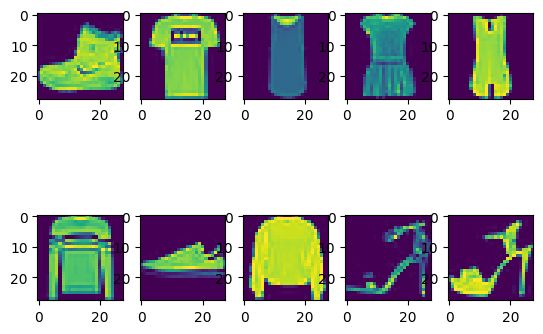

In [8]:


fig,arg=plt.subplots(2,5)
for row in range(2):
  for col in range(5):
    arg[row][col].imshow(X_train[row*5+col])


## plot the first 10 classes images

In [9]:
ls=[]

for classes in range(10):
  index=0
  for label in y_train:
    if label==classes:
      ls.append(X_train[index])
      break
    else:
      index+=1


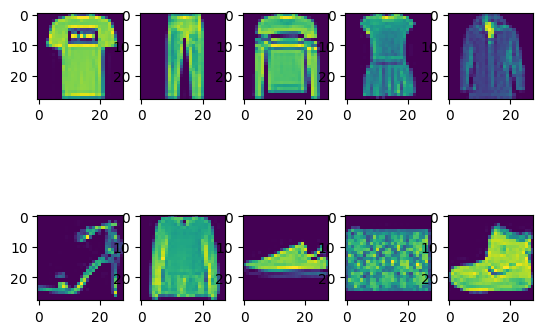

In [10]:
fig,arg=plt.subplots(2,5)
for row in range(2):
  for col in range(5):
    arg[row][col].imshow(ls[row*5+col])

In [11]:
labels=np.arange(10).tolist()

In [12]:
label_names=["T-shirt/top",
             "Trouser",
             "Pullover",
             "Dress",
             "Coat",
             "Sandal",
             "Shirt",
             "Sneaker",
             "Bag",
             "Ankle boot"]

In [13]:
classes= {key:value for key, value in zip(labels,label_names)}
classes

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

# Normalize the dataset to [0,1]

In [14]:
X_train=X_train/255.
X_test=X_test/255.

# build a simple CNN

In [148]:
def create_model():

  model=Sequential()
  model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
  model.add(layers.MaxPooling2D(2,2))
  model.add(layers.Conv2D(32,(3,3),activation='relu'))
  model.add(layers.MaxPooling2D(2,2))
  model.add(layers.Flatten())
  model.add(layers.Dense(64,activation='relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(10,activation='softmax'))

  return model

fashion_model=create_model()

In [149]:
fashion_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 5, 5, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_13 (Flatten)        (None, 800)               0         
                                                                 
 dense_26 (Dense)            (None, 64)              

In [150]:
optimizer=tf.keras.optimizers.Adam()

fashion_model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer, metrics=['accuracy'])

# Find the optimal learningRate

In [146]:
# Set the learning rate scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-3 * 10**(epoch / 20))

In [147]:
history=fashion_model.fit(X_train,y_train,epochs=10,callbacks=[lr_schedule])

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5725 - accuracy: 0.7935 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3866 - accuracy: 0.8604 - lr: 0.0011
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3418 - accuracy: 0.8776 - lr: 0.0013
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3191 - accuracy: 0.8837 - lr: 0.0014
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2986 - accuracy: 0.8902 - lr: 0.0016
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2863 - accuracy: 0.8946 - lr: 0.0018
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2767 - accuracy: 0.8970 - lr: 0.0020
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2758 - accuracy: 0.8993 - lr: 0.0022
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.27

(0.001, 0.01, 0.2, 0.8)

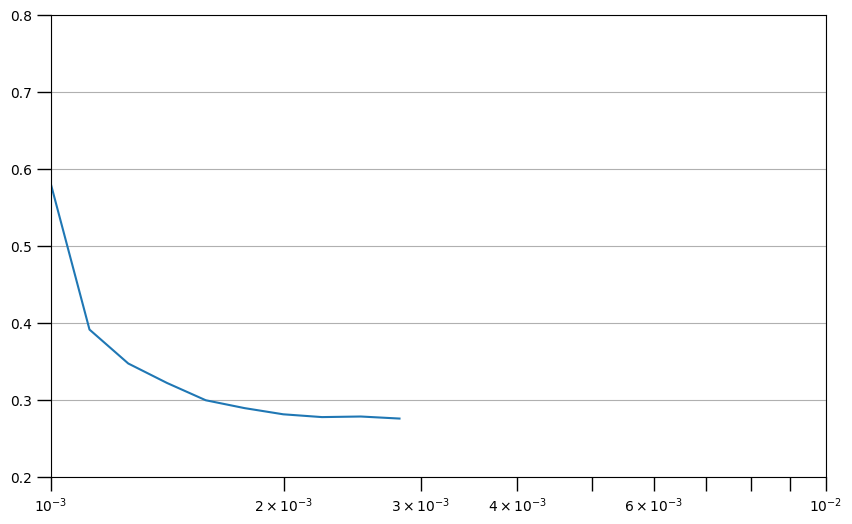

In [134]:
# Define the learning rate array
lrs = 1e-3 * (10 ** (np.arange(10) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([ 1e-3, 1e-2,0.2,0.8])

# Train the model

In [151]:
lr=1e-3

optimizer=tf.keras.optimizers.Adam(learning_rate=lr)

fashion_model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer, metrics=['accuracy'])

In [152]:
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if (logs.get('val_accuracy')>0.95):
      print("\nval_accuracy is higher than 0.95, so cancelling training!")
      self.model.stop_training=True

accuracy_callback=mycallback()

In [153]:
history=fashion_model.fit(X_train,y_train,validation_split=0.2,epochs=20,verbose=2,callbacks=[accuracy_callback],shuffle=True)

Epoch 1/20
1500/1500 - 6s - loss: 0.5939 - accuracy: 0.7846 - val_loss: 0.4061 - val_accuracy: 0.8534 - 6s/epoch - 4ms/step
Epoch 2/20
1500/1500 - 4s - loss: 0.3915 - accuracy: 0.8598 - val_loss: 0.3329 - val_accuracy: 0.8788 - 4s/epoch - 3ms/step
Epoch 3/20
1500/1500 - 4s - loss: 0.3423 - accuracy: 0.8750 - val_loss: 0.3191 - val_accuracy: 0.8790 - 4s/epoch - 3ms/step
Epoch 4/20
1500/1500 - 5s - loss: 0.3097 - accuracy: 0.8865 - val_loss: 0.2982 - val_accuracy: 0.8884 - 5s/epoch - 3ms/step
Epoch 5/20
1500/1500 - 4s - loss: 0.2885 - accuracy: 0.8940 - val_loss: 0.2891 - val_accuracy: 0.8925 - 4s/epoch - 3ms/step
Epoch 6/20
1500/1500 - 4s - loss: 0.2712 - accuracy: 0.8999 - val_loss: 0.2792 - val_accuracy: 0.8992 - 4s/epoch - 3ms/step
Epoch 7/20
1500/1500 - 4s - loss: 0.2563 - accuracy: 0.9057 - val_loss: 0.2696 - val_accuracy: 0.9032 - 4s/epoch - 3ms/step
Epoch 8/20
1500/1500 - 4s - loss: 0.2425 - accuracy: 0.9113 - val_loss: 0.2747 - val_accuracy: 0.8946 - 4s/epoch - 3ms/step
Epoch 9/

# Evaluate the results

In [154]:
epochs=range(len(history.history['loss']))

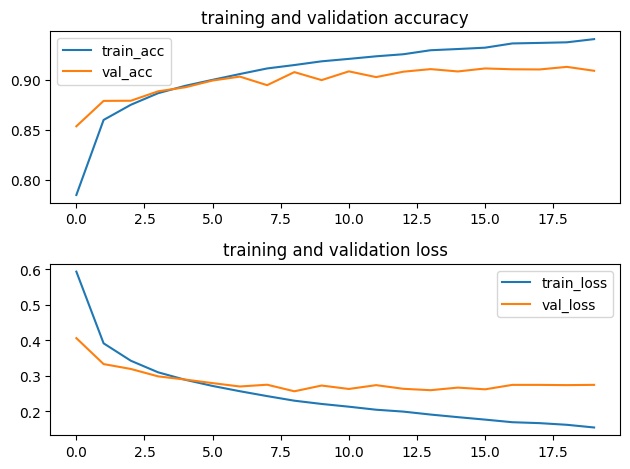

In [155]:
fig,(arg1,arg2)=plt.subplots(2,1)

arg1.plot(epochs,history.history['accuracy'],label='train_acc')
arg1.plot(epochs,history.history['val_accuracy'],label='val_acc')
arg1.set_title("training and validation accuracy")
arg1.legend()

arg2.plot(epochs,history.history['loss'],label='train_loss')
arg2.plot(epochs,history.history['val_loss'],label='val_loss')
arg2.set_title("training and validation loss")
arg2.legend()

fig.tight_layout()
fig.show()

# Model Prediction

In [156]:
y_prediction=fashion_model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [157]:
y_prediction.shape

(10000, 10)

In [158]:
y_p=np.argmax(y_prediction,axis=1)

In [159]:
y_p.shape

(10000,)

In [160]:
from sklearn.metrics import accuracy_score
test_acc=accuracy_score(y_test,y_p)
print(f"the accuracy for test dateset is {test_acc}")

the accuracy for test dateset is 0.9059


In [161]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_p)

print(cm)

[[857   1  19  19   2   1  97   0   4   0]
 [  3 980   1   9   2   0   2   0   3   0]
 [ 14   1 881   6  40   0  56   0   2   0]
 [ 12   6  12 911  25   0  30   0   3   1]
 [  0   1  57  22 843   0  75   0   2   0]
 [  0   0   0   0   0 985   0  10   1   4]
 [128   0  67  27  54   0 715   0   9   0]
 [  0   0   0   0   0  18   0 946   0  36]
 [  5   1   6   4   2   4   4   1 972   1]
 [  0   0   0   0   0   6   1  24   0 969]]


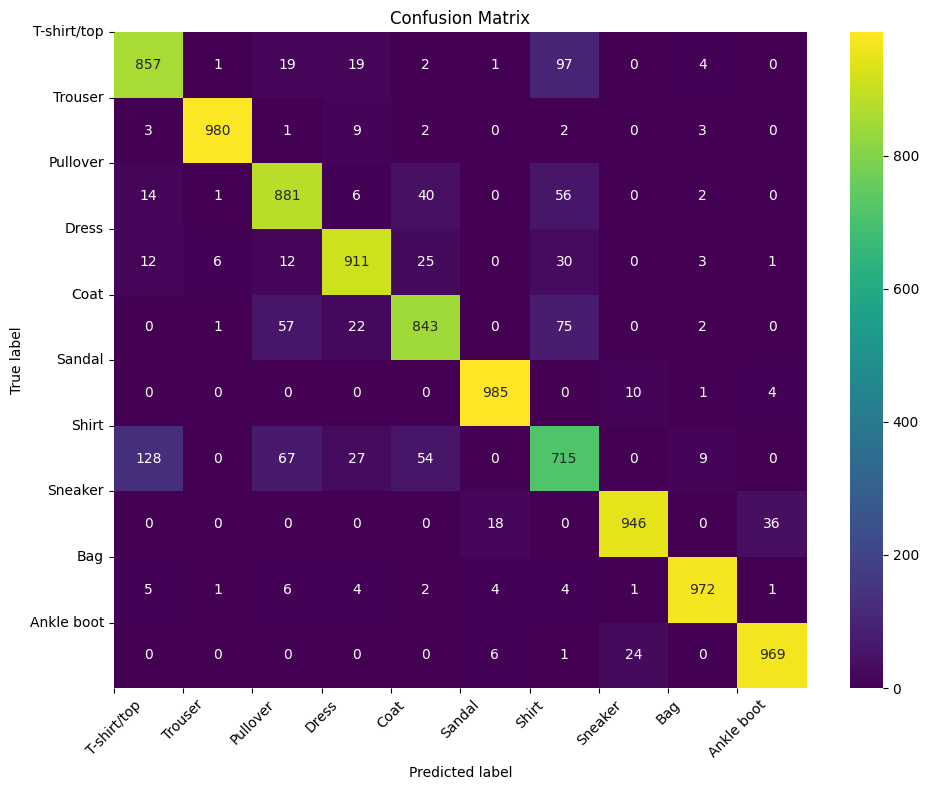

In [162]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,cmap='viridis',fmt='.0f')  # Use a colormap for better visualization
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.xticks(range(len(labels)), label_names, rotation=45)  # Rotate x-axis labels for readability
plt.yticks(range(len(labels)), label_names, rotation=0)
plt.tight_layout()
plt.show()


In [92]:
from sklearn.metrics import classification_report
cfr=classification_report(y_test,y_p)
print(cfr)

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.85      0.85      0.85      1000
           3       0.92      0.89      0.90      1000
           4       0.82      0.88      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.74      0.68      0.71      1000
           7       0.95      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

